# Import Data, libraries...

In [197]:
from pandas_profiling import ProfileReport
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [198]:
train = pd.read_csv('train.csv', parse_dates=['DateTime'])

# Exploratory Data Analysis

In [199]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [200]:
train.dtypes

AnimalID                  object
Name                      object
DateTime          datetime64[ns]
OutcomeType               object
OutcomeSubtype            object
AnimalType                object
SexuponOutcome            object
AgeuponOutcome            object
Breed                     object
Color                     object
dtype: object

In [201]:
train.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A662512,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824
first,NaN,NaN,2013-10-01 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-02-21 19:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


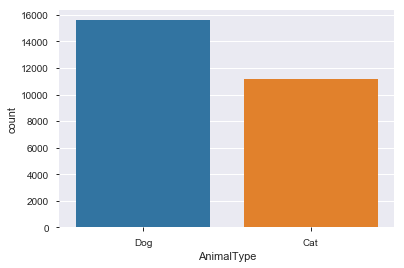

In [202]:
sns.countplot(data=train, x='AnimalType')

In [203]:
train["ignore"] = 0 # do this to fix issue with panda_profiling
ProfileReport(train)

Number of variables,11
Number of observations,26729
Total Missing (%),7.3%
Total size in memory,2.2 MiB
Average record size in memory,88.0 B
Numeric,0
Categorical,8
Boolean,0
Date,1
Text (Unique),1
Rejected,1


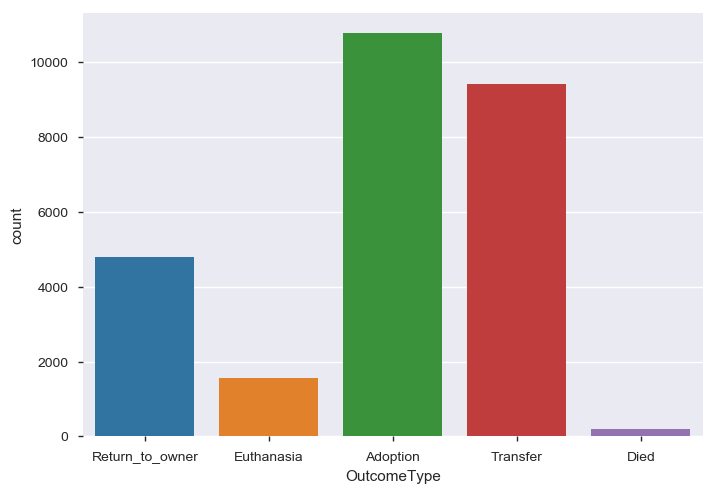

In [204]:
sns.countplot(data=train, x='OutcomeType')

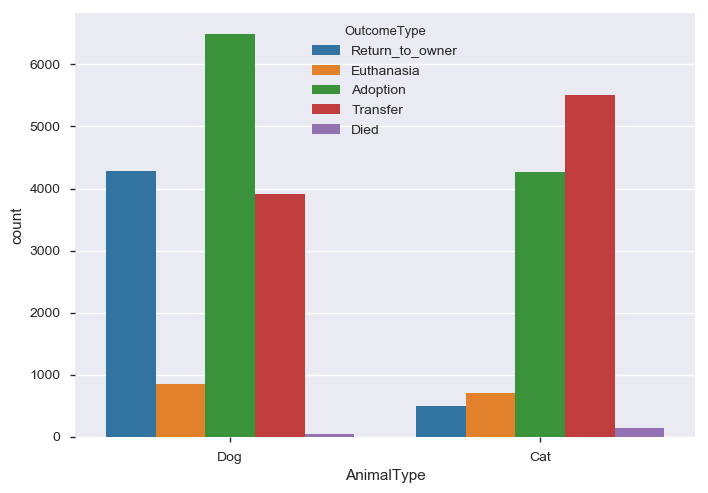

In [205]:
sns.countplot(data=train, x='AnimalType', hue='OutcomeType')

# Clean data

In [206]:
def agetodays(x):
    try:
        y = x.split()
    except:
        return None 
    if 'year' in y[1]:
        return float(y[0]) * 365
    elif 'month' in y[1]:
        return float(y[0]) * (365/12)
    elif 'week' in y[1]:
        return float(y[0]) * 7
    elif 'day' in y[1]:
        return float(y[0])

train['AgeInDays'] = train.AgeuponOutcome.map(agetodays)

In [207]:
# remove empty age records
train = train[~train.AgeInDays.isnull()]

In [208]:
train = pd.get_dummies(train, columns=['AnimalType', 'SexuponOutcome'] )

# Decide on Inputs (X) and Output (Y)

In [209]:
from sklearn.model_selection import train_test_split

X = train[['AgeInDays', 'AnimalType_Dog', 'AnimalType_Cat', 'SexuponOutcome_Intact Female', 'SexuponOutcome_Intact Male', 'SexuponOutcome_Neutered Male', 'SexuponOutcome_Spayed Female', 'SexuponOutcome_Unknown']]
y = train['OutcomeType']

# Split the data

In [210]:
trainX, testX, trainY, testY = train_test_split(X, y, random_state=0, train_size=0.5, test_size=0.5)

# Decide on the estimator / algorithm + hyperparameters (sklearn)

In [211]:
from sklearn.ensemble import RandomForestClassifier

testModel = RandomForestClassifier(n_estimators=99)

# Fit (train) the learner

In [212]:
testModel = testModel.fit(trainX, trainY)

# Predict

In [213]:
testModel2 = testModel.predict(testX)

In [214]:
from sklearn.metrics import accuracy_score
accuracy_score(testY, testModel2)

0.6314016172506739